In [114]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re

In [115]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
nltk.download("vader_lexicon", quiet=True)

True

## Extracting comments using youtube API

In [116]:
from apiclient.discovery import build
import pandas as pd 

In [117]:
api_key=""

In [118]:
youtube = build('youtube','v3',
                developerKey=api_key)

In [120]:
def video_comments(video_id):
    # creating youtube resource object
    youtube = build('youtube', 'v3',developerKey=api_key)
 
    # retrieve youtube video results
    video_response=youtube.commentThreads().list(
    part='snippet',
    videoId=video_id,
    textFormat="plainText", 
    maxResults=100
    ).execute()
 
    # iterate video response
    while video_response:
       
        # extracting required info
        # from each result object
        for item in video_response['items']:
           
            # Extracting comments
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
             
            # counting number of reply of comment
            like=item['snippet']['topLevelComment']['snippet']['likeCount']
            record=[]
            record.append(comment)
            record.append(like)
            raw_data.append(record)
 
        if 'nextPageToken' in video_response:
            video_response = youtube.commentThreads().list(
                    part = 'snippet',
                    videoId = video_id,
                    textFormat="plainText",
                    pageToken=video_response["nextPageToken"],
                    maxResults=100,
                ).execute()
        else:
            break
 

In [121]:
video_id = "Enter Video ID"

# Call function
raw_data=[]
video_comments("Zhpk3ML7bIQ")

😂😂😂GG
Not funny
😂😂
This short has 53 million dislikes
Ban

What a fkng rtrdd channel
😂😂😂😂😂😂😂😂😂😂🎉 هههههههههههه
Not staged at all
I don't even get the point of this video am sorry
chơi giống mắt quá ông ơi
W for the 54M dislikes💀
Abruti
خسصجلسجبننهبصحباظيطسرزسجعاؤن😢😢🎉🎉🎉🎉🎉🎉🎉😂😂قخقخصخبغيخسعيعheohdhdh😂😂😂😂😂😂😂😂😊😊❤❤❤❤❤🤩🤩😛😛😛😁😁😁😒😿
ه‍ههههه
Hhhhh
Ich bin auch Youtuber
Bro😂
your bad
Dislike, asco de persona
Ok imbecil... Que de gracia es esto
As natural as daylight
That's why I don't have friends
He is so funny
بلعافيه
خرابت العيش
😂😂😂😂😂
-50 rps 🙃
adirei
❤
Dude hair is still wet stop ot fake video CAP!
It’s not funny and it wasted money and plastic but then again Americans
Idiocy and the same jokes! Jerk! crazy
😂
😂😂😂😂
greetings  from  doorstepcarwash 


Now in kundapura 

                                   Do Follow & share
Ебать дыбил  испортил матрас.даун типа загнался, ха ха ха ка смешно
🤥 😂 …..
Se forçar mais caga
And that's more plastic garbage, a total waste. 😡
Same generation is worried about 

In [122]:
raw_data

[['😂😂😂GG', 0],
 ['Not funny', 0],
 ['😂😂', 0],
 ['This short has 53 million dislikes', 1],
 ['Ban\n\nWhat a fkng rtrdd channel', 0],
 ['😂😂😂😂😂😂😂😂😂😂🎉 هههههههههههه', 0],
 ['Not staged at all', 0],
 ["I don't even get the point of this video am sorry", 0],
 ['chơi giống mắt quá ông ơi', 0],
 ['W for the 54M dislikes💀', 0],
 ['Abruti', 0],
 ['خسصجلسجبننهبصحباظيطسرزسجعاؤن😢😢🎉🎉🎉🎉🎉🎉🎉😂😂قخقخصخبغيخسعيعheohdhdh😂😂😂😂😂😂😂😂😊😊❤❤❤❤❤🤩🤩😛😛😛😁😁😁😒😿',
  0],
 ['ه\u200dههههه', 0],
 ['Hhhhh', 0],
 ['Ich bin auch Youtuber', 0],
 ['Bro😂', 0],
 ['your bad', 0],
 ['Dislike, asco de persona', 0],
 ['Ok imbecil... Que de gracia es esto', 0],
 ['As natural as daylight', 0],
 ["That's why I don't have friends", 0],
 ['He is so funny', 0],
 ['بلعافيه', 0],
 ['خرابت العيش', 0],
 ['😂😂😂😂😂', 0],
 ['-50 rps 🙃', 0],
 ['adirei', 0],
 ['❤', 0],
 ['Dude hair is still wet stop ot fake video CAP!', 0],
 ['It’s not funny and it wasted money and plastic but then again Americans',
  0],
 ['Idiocy and the same jokes! Jerk! crazy', 0],
 ['😂

## CREATING MODEL 

In [123]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import string


In [124]:
df=pd.DataFrame(raw_data)
df.columns=["COMMENTS","LIKES"]
df.sort_values("LIKES",ascending=False,inplace=True)
df

,COMMENTS,LIKES
17571,If you ever feel useless remember this guy exi...,90796
60198,Blood is red\nSky is blue\nWe got scammed\nThe...,77575
17909,People in 1912: In 2023 we will have flying ca...,21010
56665,"Time to press ""Don't recommend this channel""",20594
24602,"""How fake do want it?""\n""Yeah.""",16126
...,...,...
21399,don't laugh,0
21401,Enaldinho brasileiro puro fingimento,0
21402,I pretty hope they cant swim,0
21403,🐮🐻🎄😋😆😊😊🐮,0


# Cleaning Data


In [125]:
snowball_stemer = SnowballStemmer(language="english")
lzr = WordNetLemmatizer()
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/arnavgupta/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [126]:
def clean_comments(dataframe: pd.DataFrame):
    dataframe["cleaned"]=(
        dataframe["COMMENTS"]
        .str.strip()
        .str.replace("\n", " ")
        .str.replace(r"[^\w\s]+", "", regex=True)
        .str.lower()
        .str.replace(r"#\S+", " ", regex=True)
    )
    stop_words=stopwords.words('english')
    punctuations=list(string.punctuation)
    dataframe["cleaned"]=dataframe["cleaned"].apply(lambda comment: " ".join([word for word in comment.split() if word not in stop_words])) #removing stop words
    dataframe["cleaned"]=dataframe["cleaned"].apply(lambda comment: " ".join([word for word in comment.split() if word not in punctuation])) # removing punctuations

    dataframe["cleaned"]=dataframe["cleaned"].apply(lambda comment:" ".join([lzr.lemmatize(word) for word in comment.split()]))#Lemmatization

    #stemming(not recommended )
    #dataframe["cleaned"]=dataframe["cleaned"].apply(lambda comment :" ".join([snowball_stemer.stem(word) for word in comment.split()]))





    return dataframe



    


In [127]:
dfc=clean_comments(df)
dfc.head(10)

,COMMENTS,LIKES,cleaned
17571,If you ever feel useless remember this guy exi...,90796,ever feel useless remember guy exists
60198,Blood is red\nSky is blue\nWe got scammed\nThe...,77575,blood red sky blue got scammed got view
17909,People in 1912: In 2023 we will have flying ca...,21010,people 1912 2023 flying car 2023 fake prankster
56665,"Time to press ""Don't recommend this channel""",20594,time press dont recommend channel
24602,"""How fake do want it?""\n""Yeah.""",16126,fake want yeah
30995,"""Can you act?""\n""No""\n""Cool, want to make a vi...",14332,act cool want make video
30116,"""Can you act?""\n""No""\n""Can you just close your...",14051,act close eye
39163,“How cringe do you want this to be?”\n“YES”,8355,cringe want yes
5805,these guys are the reason shampoo has instruct...,6658,guy reason shampoo instruction
54711,"""When a guy whispers in start of the video, u ...",5931,guy whisper start video u know fake ray willia...


In [140]:
def _get_polarity_score(analyzer: SentimentIntensityAnalyzer, text: str):

    scores = analyzer.polarity_scores(text)
    return scores["compound"]

def _convert_score_to_sentiment(score):
    sentiment = ""

    if score <0.0:
        sentiment = "Negative"
    elif -.05< score <= 0.5:
        sentiment = "Neutral"
    elif score >0.5:
        sentiment = "Positive"

    return sentiment

In [141]:
def test_1(dataframe : pd.DataFrame):
    analyzer=SentimentIntensityAnalyzer()
    dataframe["score"]=dataframe["cleaned"].apply(
        lambda comment : _get_polarity_score(analyzer,comment)
    )

    dataframe["sentiments"]=dataframe["score"].apply(
        lambda score: _convert_score_to_sentiment(score)
    )

    return dataframe

In [142]:
dff=test_1(dfc)
dff

,COMMENTS,LIKES,cleaned,score,sentiments
17571,If you ever feel useless remember this guy exi...,90796,ever feel useless remember guy exists,-0.4215,Negative
60198,Blood is red\nSky is blue\nWe got scammed\nThe...,77575,blood red sky blue got scammed got view,0.0000,Neutral
17909,People in 1912: In 2023 we will have flying ca...,21010,people 1912 2023 flying car 2023 fake prankster,-0.4767,Negative
56665,"Time to press ""Don't recommend this channel""",20594,time press dont recommend channel,-0.2755,Negative
24602,"""How fake do want it?""\n""Yeah.""",16126,fake want yeah,-0.1531,Negative
...,...,...,...,...,...
21399,don't laugh,0,dont laugh,-0.4449,Negative
21401,Enaldinho brasileiro puro fingimento,0,enaldinho brasileiro puro fingimento,0.0000,Neutral
21402,I pretty hope they cant swim,0,pretty hope cant swim,0.7269,Positive
21403,🐮🐻🎄😋😆😊😊🐮,0,,0.0000,Neutral


In [143]:
sentiment_counts_df = dff["sentiments"].value_counts().to_frame()
sentiment_counts_df.reset_index(inplace=True)
sentiment_counts_df.rename(columns={"index": "Sentiment", "sentiments": "Counts"}, inplace=True)
sentiment_counts_df = sentiment_counts_df.set_index("Sentiment")
sentiment_counts_df


,Counts
Sentiment,
Neutral,45125
Negative,12537
Positive,3358


In [144]:
stats=dff["sentiments"].value_counts()
stats

Neutral     45125
Negative    12537
Positive     3358
Name: sentiments, dtype: int64

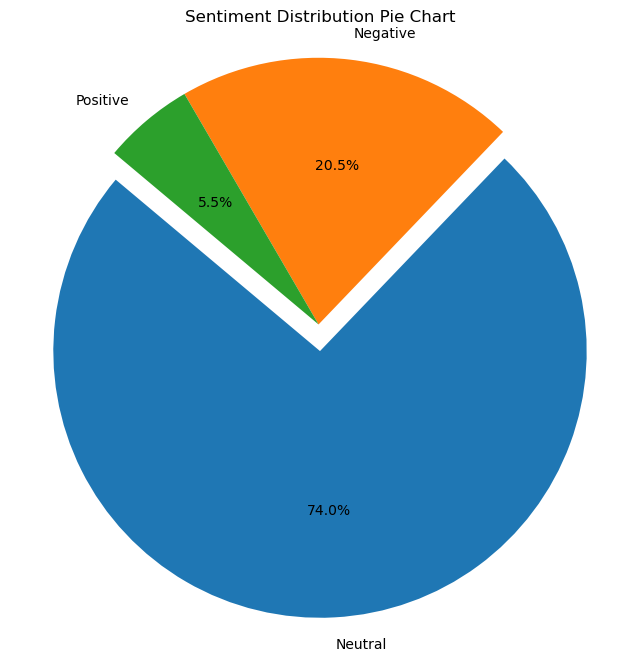

In [146]:
labels = sentiment_counts_df.index
counts = sentiment_counts_df["Counts"]

plt.figure(figsize=(8, 8)) 

max_index = counts.idxmax()
explode = [0.1 if sentiment == max_index else 0 for sentiment in labels]


plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)

plt.title('Sentiment Distribution Pie Chart')

plt.axis('equal')  
plt.show()
